In [114]:
import numpy as np
import pandas as pd

df = pd.read_csv('bang cho vay.csv')
df

,Luong,Thoi gian lam viec,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [115]:
# Áp dụng gradient descent để viết hàm tính xác suất cho vay
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent(X, y, initial_theta, learning_rate, max_iterations, epsilon):
    current_theta = initial_theta.copy()
    i = 0
    while i <= max_iterations:
        gradient = -X.T.dot(y - X.dot(current_theta))
        next_theta = current_theta - learning_rate * gradient
        if np.linalg.norm(gradient) < epsilon:
            return next_theta
        current_theta = next_theta
        i += 1
    return 0

def predict(theta, X):
    z = np.dot(X, theta)
    return sigmoid(z)

# Chuẩn bị dữ liệu
X = df[['Luong', 'Thoi gian lam viec']].values
y = df['Cho vay'].values
X = np.c_[np.ones(X.shape[0]), X]
initial_theta = np.zeros(X.shape[1])
theta = gradient_descent(X, y, initial_theta, 0.001, 10000, 1e-2)
X_new = np.array([[1, 9, 0.5]])
probability = predict(theta, X_new)
print("Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là:", probability[0] * 100, "%")

Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là: 65.13303842603345 %


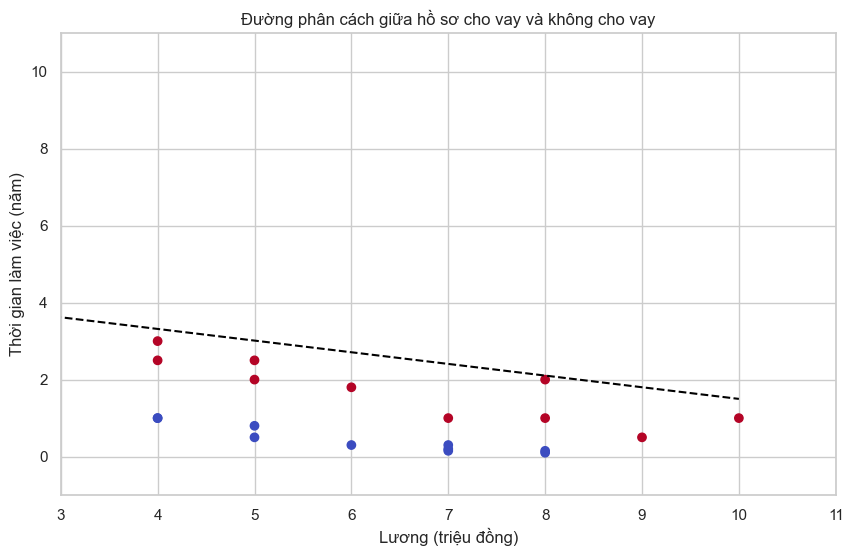

In [116]:
# Giả sử ngân hàng yêu cầu hồ sơ đạt 80% mới cho vay, vẽ đồ thị phân cách giữa hồ sơ cho vay và không cho vay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(df['Luong'], df['Thoi gian lam viec'], c=df['Cho vay'], cmap='coolwarm')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.title('Phân loại hồ sơ cho vay')

plt.xlim(3, 11)
plt.ylim(-1, 11)


# Vẽ đường phân cách
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = predict(theta, np.c_[np.ones(X1.ravel().shape[0]), X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
plt.title('Đường phân cách giữa hồ sơ cho vay và không cho vay')
plt.show()

In [117]:
# Accelerated Gradient Descent
def accelerated_gradient_descent(X, y, initial_theta, learning_rate, max_iterations, epsilon):
    current_theta = initial_theta.copy()
    m = X.shape[0]
    v = np.zeros_like(current_theta)
    beta = 0.9  # Hệ số ma sát
    i = 0
    while i <= max_iterations:
        gradient = -X.T.dot(y - X.dot(current_theta)) / m
        v = beta * v + (1 - beta) * gradient
        next_theta = current_theta - learning_rate * v
        if np.linalg.norm(gradient) < epsilon:
            return next_theta
        current_theta = next_theta
        i += 1
    return 0

theta = accelerated_gradient_descent(X, y, initial_theta, 0.1, 1000, 1e-2)
X_new = np.array([[1, 9, 0.5]])
probability = predict(theta, X_new)
print("Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là:", probability[0] * 100, "%")

Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là: 64.15132993427457 %


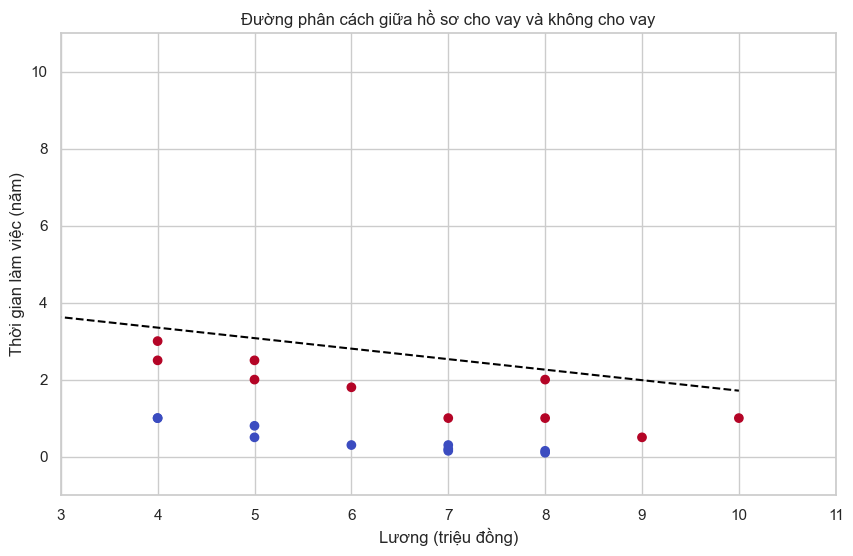

In [118]:
# Giả sử ngân hàng yêu cầu hồ sơ đạt 80% mới cho vay, vẽ đồ thị phân cách giữa hồ sơ cho vay và không cho vay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(df['Luong'], df['Thoi gian lam viec'], c=df['Cho vay'], cmap='coolwarm')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.title('Phân loại hồ sơ cho vay')

plt.xlim(3, 11)
plt.ylim(-1, 11)


# Vẽ đường phân cách
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = predict(theta, np.c_[np.ones(X1.ravel().shape[0]), X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
plt.title('Đường phân cách giữa hồ sơ cho vay và không cho vay')
plt.show()